## DATASET CREATION

Unfortunately, the dataset I will work with does not come as one already done dataset - as it is mostly usual in Data Science projects. <br /> 
To get the sheer experience of how a normal Data Science job looks like I also wanted to dive into this issue. By experience I can tell that this takes a shit ton of time - like almost 80% - of preparing the data. <br /> 
Since the data usually shares the same countries and lists mostly the same years of the recording I used this as a primary key where I connect the datapoints with each other. <br /> 
However, the  countries are listed in rows along with the year of the recording - I want to have a final dataset that looks like follows: <br /> 

|Country | Afghanistan | Albania | ... | Zimbabwe | 
| ----- | ----------  | ------ | ----- | ------- | 
|Alcohol consumption [l] | 0.2 | 2.4 | ... | 0.01 |
|Human Develpment Index (HDI) | 0.1 | 0.15 | ... | 0.1 | 
|... | ... | ... | ... | ... |
|Healthcare Expenditure [$] | 13.322 | 15.211 | ... | 1.039 |

Thus, I have to transpose each of the countries and record each of the years as seperate entry in the dataset. <br /> 

All the data is [publicly available](https://ourworldindata.org), and this source is trusted by many notorious companies such as Vox, The Ney York times and even the top universities of this world like MIT, Oxford, Stanford. <br /> 
Hence, I assume that this data is rather based on actual recording from the respective country. <br /> 
Even the United Nation published their records in this page and I bet that these folks do some amazing work, which we can trust. <br />


But now let's not waste too much with the explaination part and go straight into how I merged the datafiles to one huge on. <br /> 

In [1]:
import os 
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Lenny\\Documents\\Studium_Robotics (M.Sc.)\\03_Semester 3 - Oslo ERASMUS\\01_Applied Data Analysis and Machine Learning\\Project 3'

In [3]:
datapath = os.path.join(os.path.join(os.getcwd(), 'data'), 'Health')

In [6]:
dataFileNames = [f for f in os.listdir(datapath) if os.path.isfile(os.path.join(datapath, f))]
type4Cols = []
type7Cols = []
manualLists = []
max_countries = 0
countries_list = []

# the datasets mostly have the same size of 4 columns and same setup so let's get those first

for file in dataFileNames: 
    try:
        df = pd.read_csv(os.path.join(datapath, str(file) ) , encoding='latin-1')
    except: 
        print(file)
        manualLists.append(file)
    if df.shape[1] == 4: # one type of files (4 columns) 
        type4Cols.append(file) 
        countries = list(set(df["Entity"]))
        if len(countries) > max_countries: 
            max_countries = len(countries)
            countries_list = countries
    elif df.shape[1] == 7: 
        type7Cols.append(file) 
    else: # manual shit  to do then 
        manualLists.append(file)
print( max_countries, countries_list)

261 ['Seychelles', 'Angola', 'Liechtenstein', 'Finland', 'Qatar', 'Samoa', 'Morocco', 'Caribbean small states', 'Papua New Guinea', 'Estonia', 'IDA total', 'Lesotho', 'Macedonia', 'Pakistan', 'World', 'Zambia', 'Maldives', 'Middle East & North Africa (IDA & IBRD)', 'South Asia (IDA & IBRD)', 'Latin America & Caribbean (IDA & IBRD)', 'Israel', 'Monaco', 'Marshall Islands', 'Ghana', 'Honduras', 'Thailand', 'Fiji', 'IDA blend', 'San Marino', 'Central Europe and the Baltics', 'Palestine', 'Ecuador', 'United Kingdom', 'Middle East & North Africa (excluding high income)', 'Kazakhstan', 'Saint Vincent and the Grenadines', 'East Asia & Pacific (excluding high income)', 'Niger', 'Iraq', 'Luxembourg', 'Guatemala', 'Bhutan', 'Tonga', 'Lebanon', 'American Samoa', 'Burundi', 'Micronesia (country)', 'Vietnam', 'Lithuania', 'Mongolia', 'IDA only', 'Afghanistan', 'Myanmar', 'Chad', 'South Asia', 'Greenland', 'Serbia', 'Bangladesh', 'Uzbekistan', 'Libya', 'Late-demographic dividend', 'New Zealand', 'Rw

In [7]:
df.head(10)

,Entity,Code,Year,Wine Consumption [l]
0,Afghanistan,AFG,1961,0.0
1,Afghanistan,AFG,1962,0.0
2,Afghanistan,AFG,1963,0.0
3,Afghanistan,AFG,1964,0.0
4,Afghanistan,AFG,1965,0.0
5,Afghanistan,AFG,1966,0.0
6,Afghanistan,AFG,1967,0.0
7,Afghanistan,AFG,1968,0.0
8,Afghanistan,AFG,1969,0.0
9,Afghanistan,AFG,1970,0.0


In [14]:
# create dataframe where we want to paste everything inside
final_df = pd.DataFrame(data = np.zeros( (10000000, max_countries) ),
                        index = np.arange(10000000),
                        columns = [ country for country in countries_list])
# save indices as strings to get meaningful names
final_df.index = final_df.index.map(str)
final_df.shape

(10000000, 261)

In [207]:
# testing to get values of the specific entries and Co
b = df[df['Entity'] == 'France']
c = b[b['Year'] == 1999]#[columns[-1]]
d = b[b['Year'] == 1999][columns[-1]].sum()

#df.groupby(["Entity", 'Year']).describe()

In [212]:
type4Cols[-1]

'wine-consumption-per-person.csv'

In [ ]:
# paste the values into the final_df from each single list

nextListIndex = 0

try: 
    for lists in type4Cols:
        ## Read the file and get the all countries along with their reported years
        print("{} list out of {}, Index: {}".format(type4Cols.index(lists), len(type4Cols), nextListIndex))
        df = pd.read_csv(os.path.join(datapath, str(lists) ) , encoding='latin-1')
        # get the col names, unique countries and unique years
        columns = list(df.columns)
        countries = list(set(df["Entity"]))
        years = list(set(df['Year']))
        
        # get a list of all the index/row names
        indexNamesArr = final_df.index.values

        ## groupby countries and then years accordingly
        #df.groupby(["Entity", 'Year'])
        
        ## BREAK TO CHECK THE CORRECT VALUES AFTER 3 LISTS
        if type4Cols.index(lists) == 3: 
            break

        firstListRun = False # flag for renaming the indices

        # loop thru every country in the list
        for country in countries:
            # take a dataframe for one country at a time
            country_df = df[df['Entity'] == country]
            i = nextListIndex # for getting the right index names

            # loop thru every year within that country
            for year in years:
                
                # rename the indices only if it is the very first run for the country
                if not firstListRun:
                    indexName = str(columns[-1]) + ' in ' + str(year)
                    indexNamesArr[i] = indexName

                ## get the proper value and fill empty ones, if not available, fill it with the average
                # note: .sum() is only having one element anyway, just done to get the value as a float not an array
                value = country_df[country_df["Year"] == year][columns[-1]].sum() if not country_df[country_df["Year"] == year][columns[-1]].empty else country_df[columns[-1]].mean()
                # assign the value in the merged df with the value 
                # THIS SEEMS TO MAKE SOME PROBLEMS!!
                final_df.iat[i, countries.index(country)] = value # .iat[row, col]
                # increase the index value 
                i = i + 1

            ## get the proper index for the next list to begin with
            nextListIndex = i    
            firstListRun = True
            
except Exception as e: 
    print("Next List Index in line: {} of {}, Matrix Size: {}, list: {}".format(i, nextListIndex, final_df.shape[0], lists))
    print(e)
    sys.exit()

0 list out of 55, Index: 0


In [13]:
final_df.head(15)

,Seychelles,Angola,Liechtenstein,Finland,Qatar,Samoa,Morocco,Caribbean small states,Papua New Guinea,Estonia,...,United States,OECD members,Other small states,Cote d'Ivoire,Aruba,Kuwait,Middle income,Cayman Islands,Indonesia,El Salvador
Agriculutral are per capita [h/person] in 1961,11.305122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1962,11.106796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1963,10.909438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1964,10.720974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1965,10.539198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1966,10.367288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1967,10.201068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1968,10.036745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1969,9.867629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agriculutral are per capita [h/person] in 1970,9.682861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.to_csv(os.path.join(datapath, "Merged UN Data.csv"))

In [35]:
df.groupby('Entity')['Wine Consumption'].sum().sort_values().tail(5)

Entity
Luxembourg    394.19
Argentina     522.36
Italy         559.67
Portugal      588.63
France        620.45
Name: Wine Consumption, dtype: float64

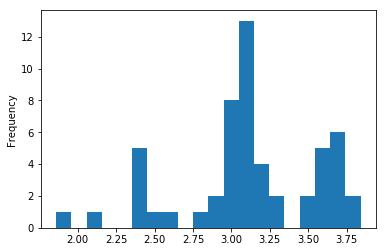

In [28]:
df[df['Entity'] == 'Germany']['Wine Consumption'].plot.hist(bins=20)